In [1]:
#Load pandas and seaborn library
import pandas as pd
import seaborn as sns

In [2]:
# Download the dataset and format it as a pandas DataFrame.
olympic_df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/athlete_events.csv')
olympic_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# Filter the DataFrame to only include the rows corresponding to medal winners.
olympic_winners_df = olympic_df.dropna(subset = ['Medal'])
olympic_winners_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [10]:
# Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
olympic_winners_2016_df = olympic_winners_df.loc[olympic_winners_df['Year'] == 2016]

# Print numbers of medals for each value of feature 'Sport'
olympic_winners_2016_df.Sport.value_counts()

Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Volleyball                72
Basketball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Weightlifting             45
Shooting                  45
Equestrianism             45
Sailing                   45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Table Tennis              24
Badminton                 24
Tennis                    24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Trampolining               6
Golf                       6
Triathlon                  6
Modern Pentathlon          6
Name: Sport, d

In [11]:
# List the top five sports
top_five_sports = dict(olympic_winners_2016_df.Sport.value_counts().head(5))

# Filter the DataFrame to only include the records for the top five sports in 2016.
olympic_top_winners_2016_df = olympic_winners_2016_df.loc[olympic_winners_2016_df['Sport'].isin(top_five_sports.keys())]
olympic_top_winners_2016_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


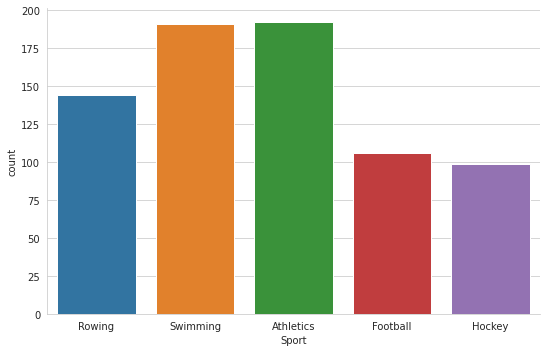

In [12]:
# Generate a bar plot of record counts corresponding to each of the top five sports.
sns.catplot('Sport', data=olympic_top_winners_2016_df, aspect=1.5, kind='count')

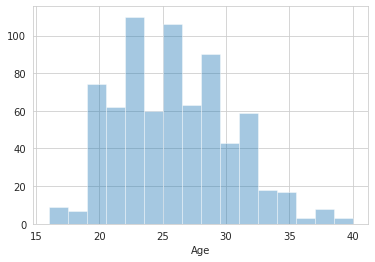

In [13]:
# Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
sns.distplot(olympic_top_winners_2016_df.Age, kde=False)

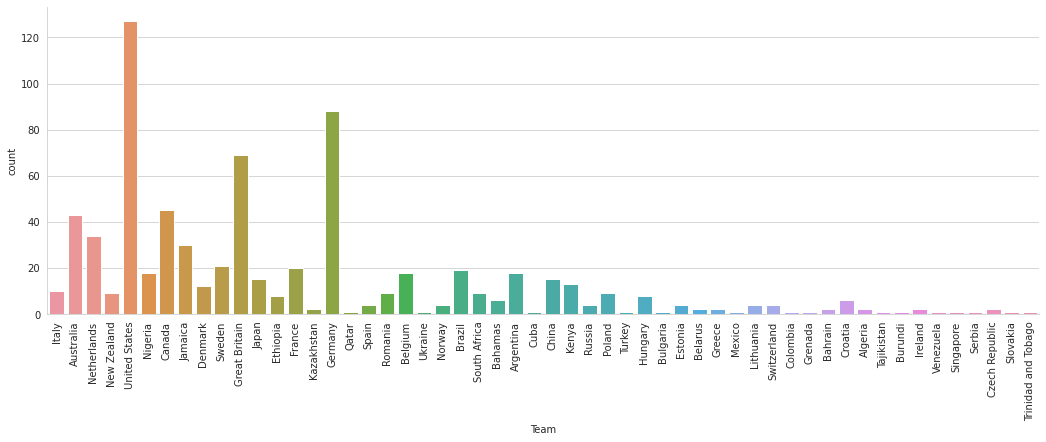

In [14]:
# Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
ax = sns.catplot('Team', data=olympic_top_winners_2016_df, aspect=3, kind='count')
ax.set_xticklabels(rotation=90)

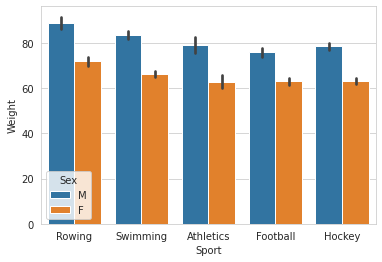

In [15]:
# Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.
sns.set_style(style="whitegrid")
sns.barplot(x='Sport', y='Weight', hue='Sex', data=olympic_top_winners_2016_df)